## ASSIGNMENT - 3

Download two RGB images from google or any other legal site and perform the following tasks in stepwise manner:
Using OpenCV read and display the image in RGB format

Implement the following functions Without Using OpenCV (from scratch):
1) Compute Histograms for both images and plot them separately
2) Perform Histogram equalization for both images separately
3) Perform Histogram specification on:
     a) On image 1 with respect to image 2
     b) On image 2 with respect to image 1
3) Validate and compare your results in 1) , 2) and 3) with the result of inbuilt functions

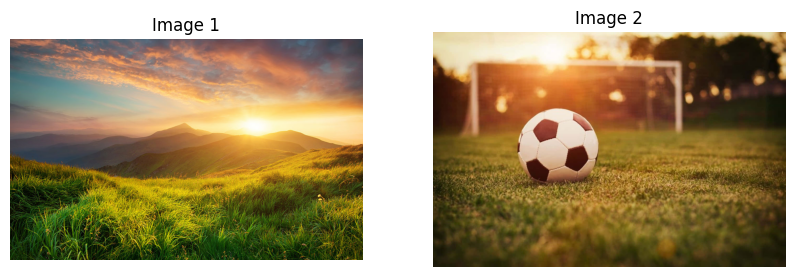

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('example_img.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('example_img_2.jpg', cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.show()
print()
print()

### 1) Compute Histograms for both images and plot them separately.

The histogram of an image normally refers to a histogram of the pixel intensity values. This histogram is a graph showing the number of pixels in an image at each different intensity value found in that image.

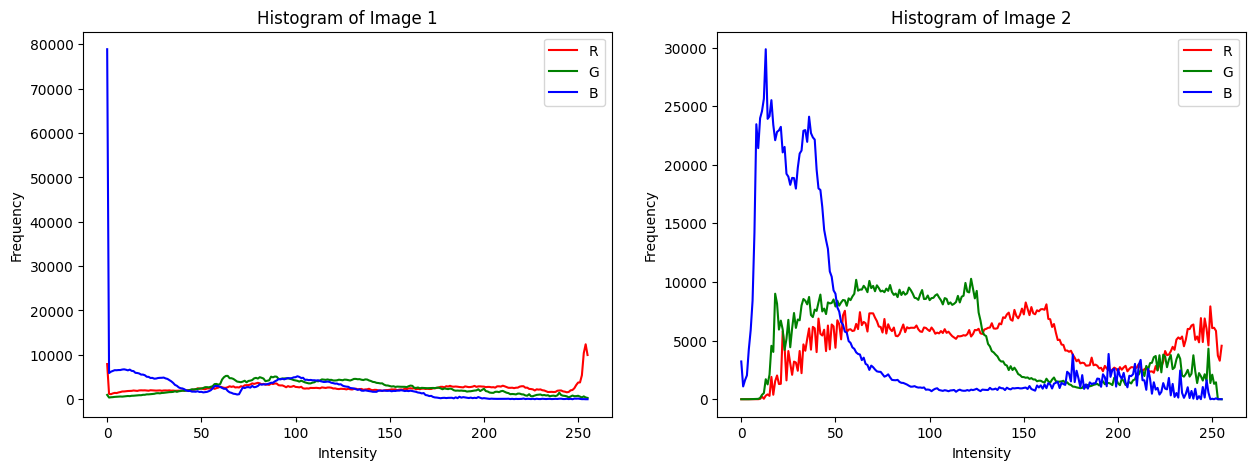

In [2]:
def compute_histogram(img):
    bins = np.zeros((256, 3), np.int32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                intensity = img[i, j, k]
                bins[intensity, k] += 1

    return bins.astype(np.uint32)

histogram1 = compute_histogram(img1)
histogram2 = compute_histogram(img2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(histogram1[:, 0], color='red', label='R')
plt.plot(histogram1[:, 1], color='green', label='G')
plt.plot(histogram1[:, 2], color='blue', label='B')
plt.title('Histogram of Image 1')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(histogram2[:, 0], color='red', label='R')
plt.plot(histogram2[:, 1], color='green', label='G')
plt.plot(histogram2[:, 2], color='blue', label='B')
plt.title('Histogram of Image 2')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.show()
print()
print()

### 2) Perform Histogram equalization for both images separately.

Histogram Equalization is an image processing technique that adjusts the contrast of an image by using its histogram. To enhance the image's contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image.

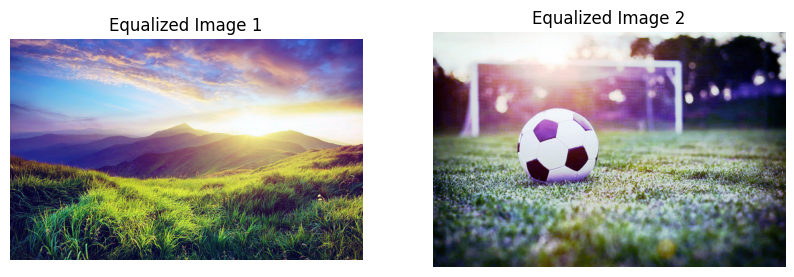

In [3]:
def histogram_equalization(img):
    img_height, img_width, _ = img.shape

    histogram = np.zeros((256, 3), np.int32)
    for i in range(img_height):
        for j in range(img_width):
            for k in range(img.shape[2]):
                intensity = img[i, j, k]
                histogram[intensity, k] += 1

    pdf_img = histogram / (img_height * img_width)

    cdf = np.cumsum(pdf_img, axis=0) * 255

    equalized_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(img_height):
        for j in range(img_width):
            for k in range(img.shape[2]):
                intensity = img[i, j, k]
                equalized_img[i, j, k] = cdf[intensity, k]

    return equalized_img

equalized_image1 = histogram_equalization(img1)
equalized_image2 = histogram_equalization(img2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image1)
plt.title('Equalized Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image2)
plt.title('Equalized Image 2')
plt.axis('off')

plt.show()
print()
print()

### 3) Perform Histogram specification on:
     a) On image 1 with respect to image 2
     b) On image 2 with respect to image 1

In image processing, histogram matching or histogram specification is the transformation of an image so that its histogram matches a specified histogram. The well-known histogram equalization method is a special case in which the specified histogram is uniformly distributed.

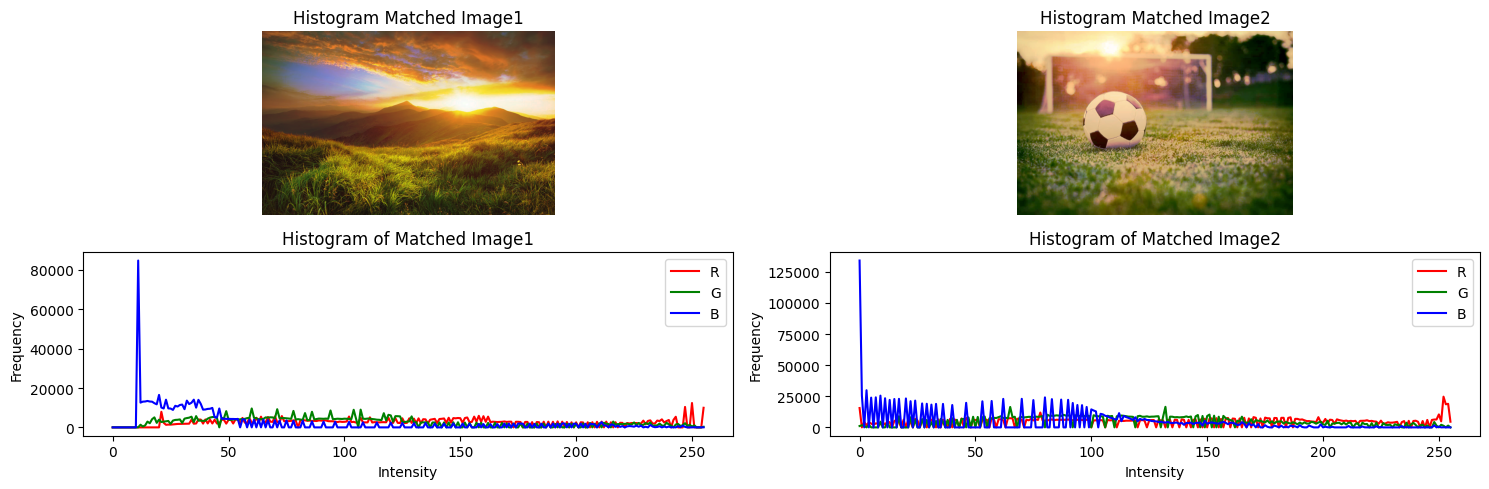

In [4]:
from skimage.exposure import cumulative_distribution

def histogram(img):
    bins = np.zeros((256, 3), dtype=np.uint32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                intensity = img[i, j, k]
                bins[intensity, k] += 1

    return bins.astype(np.uint32)

def cdf(im):
    cdfs = []
    for channel in range(im.shape[2]):
        c, b = cumulative_distribution(im[:,:,channel])
        c = np.insert(c, 0, [0]*b[0])
        c = np.append(c, [1]*(255-b[-1]))
        cdfs.append(c)
    return cdfs

def hist_matching(c, c_t, im):
    new_im = np.zeros_like(im)
    for channel in range(im.shape[2]):
        pixels = np.arange(256)
        new_pixels = np.interp(c[channel], c_t[channel], pixels)
        new_im[:,:,channel] = (np.reshape(new_pixels[im[:,:,channel].ravel()], im[:,:,channel].shape)).astype(np.uint8)
    return new_im

c_img1 = cdf(img1)
c_img_t1 = cdf(img2)

c_img2 = cdf(img2)
c_img_t2 = cdf(img1)

matched_img1 = hist_matching(c_img1, c_img_t1, img1)
matched_img2 = hist_matching(c_img2, c_img_t2, img2)

plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.imshow(matched_img1)
plt.title('Histogram Matched Image1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(matched_img2)
plt.title('Histogram Matched Image2')
plt.axis('off')

plt.subplot(2, 2, 3)
hist_matched_img1 = histogram(matched_img1)
plt.plot(hist_matched_img1[:, 0], color='red', label='R')
plt.plot(hist_matched_img1[:, 1], color='green', label='G')
plt.plot(hist_matched_img1[:, 2], color='blue', label='B')
plt.title('Histogram of Matched Image1')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
hist_matched_img2 = histogram(matched_img2)
plt.plot(hist_matched_img2[:, 0], color='red', label='R')
plt.plot(hist_matched_img2[:, 1], color='green', label='G')
plt.plot(hist_matched_img2[:, 2], color='blue', label='B')
plt.title('Histogram of Matched Image2')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
print()
print()

### 4) Validate and compare your results in 1) , 2) and 3) with the result of inbuilt functions.

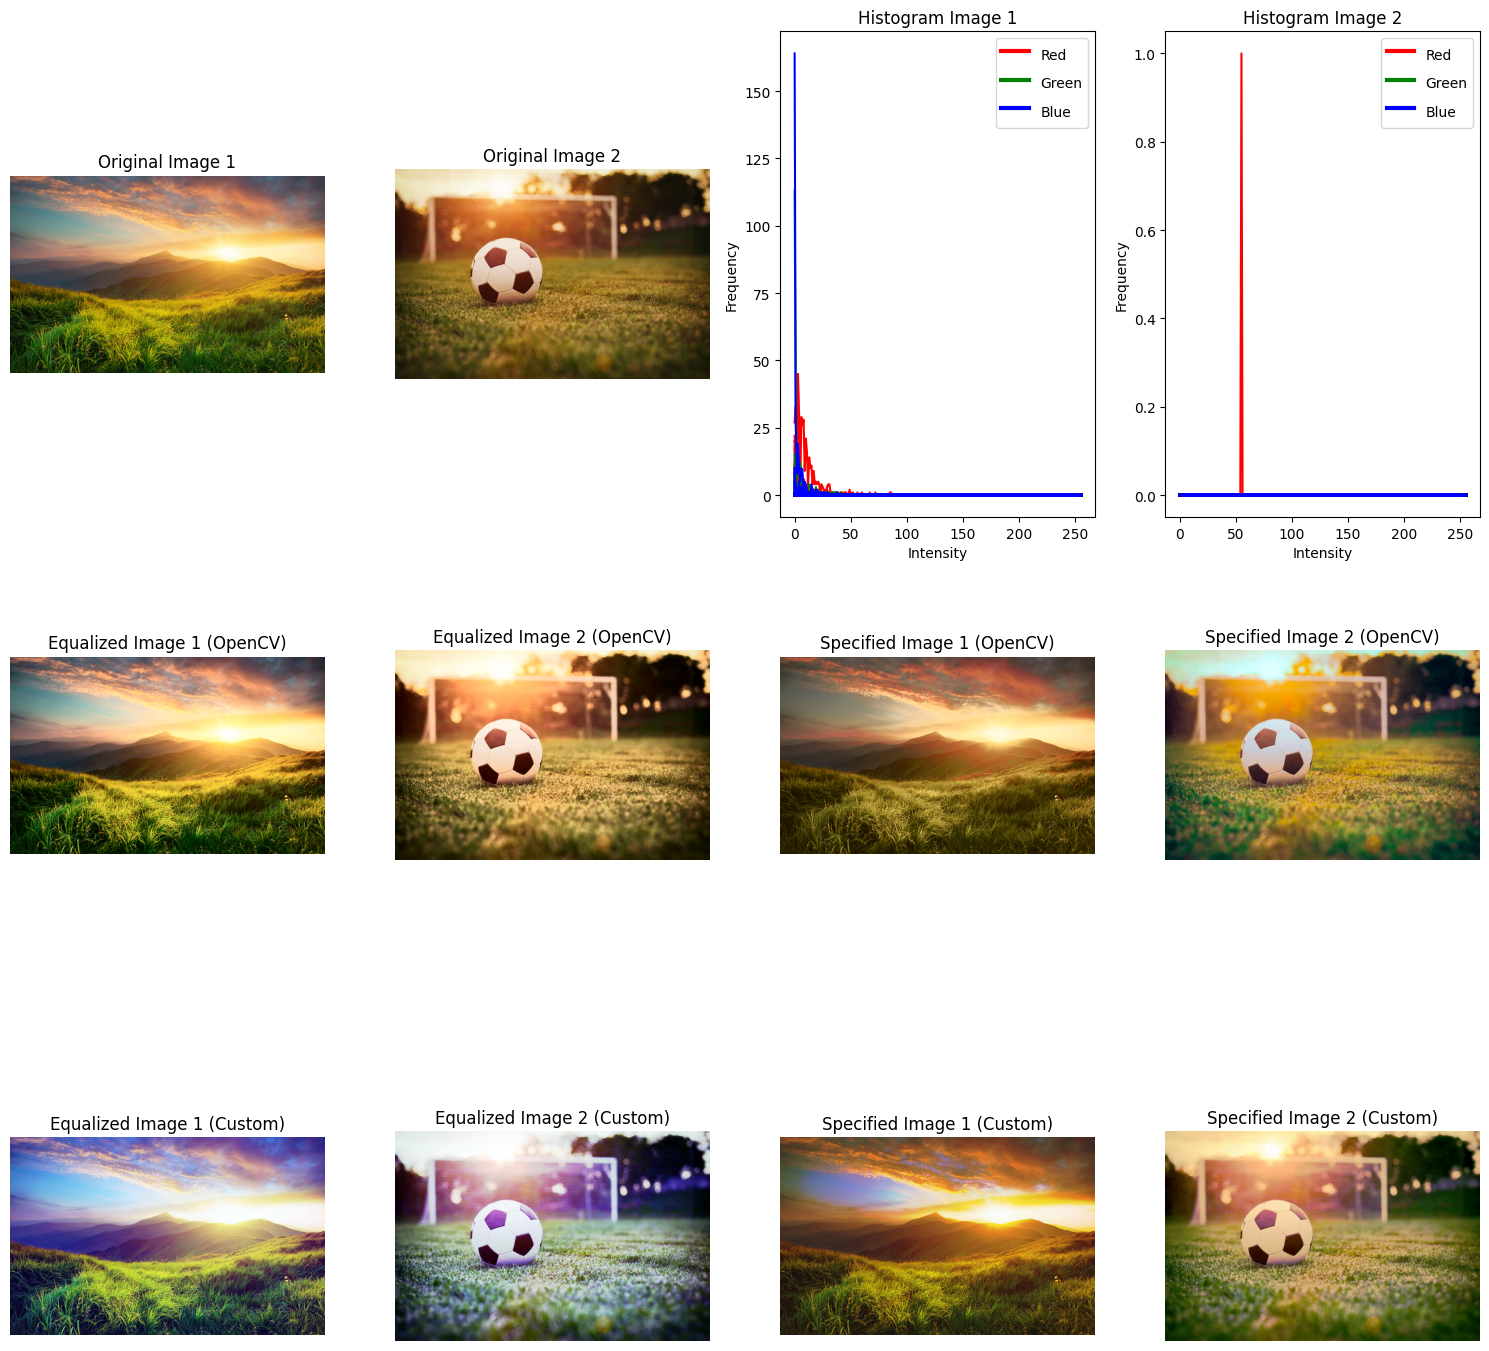

In [5]:
def compute_histogram_cv(image):
    histogram = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    return histogram.astype(np.uint32)

def histogram_equalization_cv(image):
    equalized_image = cv2.cvtColor(image, cv2.COLOR_RGB2Lab)
    equalized_image[:, :, 0] = cv2.equalizeHist(equalized_image[:, :, 0])
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_Lab2RGB)
    return equalized_image

def histogram_specification_cv(source, template):
    source_lab = cv2.cvtColor(source, cv2.COLOR_RGB2Lab)
    template_lab = cv2.cvtColor(template, cv2.COLOR_RGB2Lab)
    source_channels = cv2.split(source_lab)
    template_channels = cv2.split(template_lab)
    matched_channels = []
    for i in range(3):
        hist_source, _ = np.histogram(source_channels[i].flatten(), bins=256, range=(0, 256))
        hist_template, _ = np.histogram(template_channels[i].flatten(), bins=256, range=(0, 256))
        cdf_source = np.cumsum(hist_source) / np.sum(hist_source)
        cdf_template = np.cumsum(hist_template) / np.sum(hist_template)
        mapping = np.interp(cdf_source, cdf_template, np.arange(256))
        matched_channels.append(cv2.LUT(source_channels[i], mapping.astype(np.uint8)))
    matched_lab = cv2.merge(matched_channels)
    matched_image = cv2.cvtColor(matched_lab, cv2.COLOR_Lab2RGB)
    return matched_image

histogram1 = compute_histogram_cv(img1)
histogram2 = compute_histogram_cv(img2)

equalized_img1_cv = histogram_equalization_cv(img1)
equalized_img2_cv = histogram_equalization_cv(img2)

specified_img1_cv = histogram_specification_cv(img1, img2)
specified_img2_cv = histogram_specification_cv(img2, img1)

plt.figure(figsize=(15, 15))

plt.subplot(3, 4, 1)
plt.imshow(img1)
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(img2)
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.plot(histogram1[:, 0], color='red')
plt.plot(histogram1[:, 1], color='green')
plt.plot(histogram1[:, 2], color='blue')
plt.title('Histogram Image 1')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
legend = plt.legend(['Red', 'Green', 'Blue'], loc='upper right', bbox_to_anchor=(1, 1), handlelength=2, handleheight=2)
for line, color in zip(legend.get_lines(), ['red', 'green', 'blue']):
    line.set_linewidth(3)
    line.set_color(color)

plt.subplot(3, 4, 4)
plt.plot(histogram2[:, 0], color='red')
plt.plot(histogram2[:, 1], color='green')
plt.plot(histogram2[:, 2], color='blue')
plt.title('Histogram Image 2')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
legend = plt.legend(['Red', 'Green', 'Blue'], loc='upper right', bbox_to_anchor=(1, 1), handlelength=2, handleheight=2)
for line, color in zip(legend.get_lines(), ['red', 'green', 'blue']):
    line.set_linewidth(3)
    line.set_color(color)

plt.subplot(3, 4, 5)
plt.imshow(equalized_img1_cv)
plt.title('Equalized Image 1 (OpenCV)')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(equalized_img2_cv)
plt.title('Equalized Image 2 (OpenCV)')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(specified_img1_cv)
plt.title('Specified Image 1 (OpenCV)')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(specified_img2_cv)
plt.title('Specified Image 2 (OpenCV)')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(equalized_image1)
plt.title('Equalized Image 1 (Custom)')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(equalized_image2)
plt.title('Equalized Image 2 (Custom)')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(matched_img1)
plt.title('Specified Image 1 (Custom)')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.imshow(matched_img2)
plt.title('Specified Image 2 (Custom)')
plt.axis('off')

plt.tight_layout()
plt.show()